# <font style = "color:rgb(50,120,229)">Auto Focus Assignment</font>

Autofocus is implemented in all digital cameras these days. 

While using your phone camera, you may have noticed, the camera goes out of focus for a second or two, and the image looks blurry for a bit. The camera quickly performs some calculations and autofocuses to bring the subject in focus. 

In SLR cameras, autofocus is activated when we press the button half way through. You can see and hear parts of the lens moving as the camera tries to autofocus. 

Whether it is an SLR camera or your phone camera, autofocussing is done by taking a series of photos of the scene while changing the distance of the image sensor from the lens inside the camera.

In this assignment, we will find the sharpest image in a video squence of a static scene. In essence, we will do the computation necessary for autofocussing. 


In [1]:
// Import libraries
#include <iostream>
#include "../resource/lib/public/includeLibraries.h"

In [2]:
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include "../resource/lib/public/displayImages.h"

In [3]:
#include "../resource/lib/public/matplotlibcpp.h"

In [4]:
#include <cmath>

In [5]:
using namespace std;

In [6]:
using namespace cv;

In [7]:
using namespace matplotlibcpp;

# <font style = "color:rgb(50,120,229)">Measures of Sharpness</font>

How do we know if an image is sharp? What is a good measure of sharpness?

As you can imagine, an out of focus image is smooth and does not have large gradient. So some function of the gradient (first derivative) of an image should help you. 

A different measure could be based on the second order derivative of the image called the Laplacian. 

In this assignment, you to have to read one paper and a section of another paper to figure out the sharpest image in a video sequence. 

1. [Diatom autofocusing in brightfield microscopy: a comparative study](http://decsai.ugr.es/vip/files/conferences/Autofocusing2000.pdf): This paper has several measures of sharpess. 

2. [Shape from Focus](http://www1.cs.columbia.edu/CAVE/publications/pdfs/Nayar_TR89.pdf): This paper is about estimating the 3D shape of a scene using focus information. In Section 5, the author discusses a measure of focus. 

## <font style = "color:rgb(50,120,229)">Assignment Instructions</font>

In this assignment, you have to implement the following measures of focus:

1. **Variance of absolute values of Laplacian** - `var_abs_laplacian` function

2. **Sum Modified Laplacian (SML)** - `sum_modified_laplacian` function

You will also have to manually specify the ROI for the flower region in the frame so that instead of carrying out the auto focus measurement on the entire frame, it can be carried out only on the flower.

## <font style = "color:rgb(50,120,229)">Grading Rubric</font>

The assignment carries **30 marks** and the marks distribution is as follows.

1. Implementing *Variance of absolute values of Laplacian* method - **10 marks** (Autograded)
2. Implementing *Sum Modified Laplacian (SML)* method - **10 marks** (Autograded)
3. Overall submission - **10 marks** (Manually graded)

A total of **5 submissions** will be allowed.

## <font style = "color:rgb(50,120,229)">Important Functions</font>

Here are some important functions that you can use in this assignment.

1. [`cv::filter2D`](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04): Convolves an image with the kernel. The function applies an arbitrary linear filter to an image.

2. [`cv::Laplacian`](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6): Calculates the Laplacian of an image.


#### <font style = "color:rgb(200,0,0)">Note</font>
Please do not look for code online!  

<hr />

In [8]:
// Implement Variance of absolute values of Laplacian - Method 1
// Input: image
// Output: Floating point number denoting the measure of sharpness of image

// Do NOT change the function name and definition

double var_abs_laplacian(Mat image){
    ///
    /// YOUR CODE HERE
    ///
    int kernelSize = 3;
    Mat roi = image.clone();
    cvtColor(roi, roi, COLOR_BGR2GRAY);
    Laplacian(roi, roi, CV_32F, kernelSize, 1, 0);
    roi = cv::abs(roi);
    Mat mean, stdDev;
    meanStdDev(roi, mean, stdDev);
    return sum(mean)[0];
}

In [9]:
// Implement Sum Modified Laplacian - Method 2
// Input: image
// Output: Floating point number denoting the measure of sharpness of image

// Do NOT change the function name and definition

double sum_modified_laplacian(Mat image){
    ///
    /// YOUR CODE HERE
    ///
    int step = 1;
    Mat roi = image.clone();
    cvtColor(roi, roi, COLOR_BGR2GRAY);
    roi.convertTo(roi, CV_32FC1, 1/255.0);
    for(int i=0; i<image.rows; i++) {
        for(int j=0; j<image.cols; j++) {
            roi.at<float>(i,j) = abs(2*roi.at<float>(i,j) - roi.at<float>(i-step,j) - roi.at<float>(i+step,j)) 
                                    + abs(2*roi.at<float>(i,j) - roi.at<float>(i,j-step) - roi.at<float>(i,j+step));
        }
    }
    
    return sum(roi)[0];
}

Let's have a look at the input video.

&nbsp;

<center>
<video controls width=800 src="https://www.dropbox.com/s/p3z0hbgo7sacqd1/focus-test.mp4?dl=1" type="video/mp4" />
</center>

In [10]:
// Read input video filename
string filename = DATA_PATH + "videos/focus-test.mp4";

// Create a VideoCapture object
VideoCapture cap(filename);

// Read first frame from the video
Mat frame;
cap >> frame;

// Display total number of frames in the video
cout << "Total number of frames : " << (int)cap.get(CAP_PROP_FRAME_COUNT);

double maxV1 = 0;
double maxV2 = 0;

// Frame with maximum measure of focus
// Obtained using methods 1 and 2
Mat bestFrame1;
Mat bestFrame2;

// Frame ID of frame with maximum measure
// of focus
// Obtained using methods 1 and 2
int bestFrameId1 = 0;
int bestFrameId2 = 0;

// Get measures of focus from both methods
double val1 = var_abs_laplacian(frame);
double val2 = sum_modified_laplacian(frame);

// Specify the ROI for flower in the frame
// UPDATE THE VALUES BELOW
int topCorner = 50;
int leftCorner = 50;
int bottomCorner = 700;
int rightCorner = 1200;

Mat flower;
flower = frame(Range(topCorner,bottomCorner),Range(leftCorner,rightCorner));

// Iterate over all the frames present in the video
while (1){
    // Crop the flower region out of the frame
    flower = frame(Range(topCorner,bottomCorner),Range(leftCorner,rightCorner));
    // Get measures of focus from both methods
    val1 = var_abs_laplacian(flower);
    val2 = sum_modified_laplacian(flower);
    // If the current measure of focus is greater 
    // than the current maximum
    if (val1 > maxV1){
        // Revise the current maximum
        maxV1 = val1;
        // Get frame ID of the new best frame
        bestFrameId1 = (int)cap.get(CAP_PROP_POS_FRAMES);
        // Revise the new best frame
        bestFrame1 = frame.clone();
        cout << "Frame ID of the best frame [Method 1]: " << bestFrameId1 << endl;
    }
    // If the current measure of focus is greater 
    // than the current maximum
    if (val2 > maxV2){
        // Revise the current maximum
        maxV2 = val2;
        // Get frame ID of the new best frame
        bestFrameId2 = (int)cap.get(CAP_PROP_POS_FRAMES);
        // Revise the new best frame
        bestFrame2 = frame.clone();
        cout << "Frame ID of the best frame [Method 2]: " << bestFrameId2 << endl;
    }
    cap >> frame;
    if (frame.empty())
        break;
}

cout << "================================================" << endl;

// Print the Frame ID of the best frame
cout << "Frame ID of the best frame [Method 1]: " << bestFrameId1 << endl;
cout << "Frame ID of the best frame [Method 2]: " << bestFrameId2 << endl;

cap.release();

Mat out;
hconcat(bestFrame1, bestFrame2, out);

Total number of frames : 186================================================
Frame ID of the best frame [Method 1]: 0
Frame ID of the best frame [Method 2]: 0


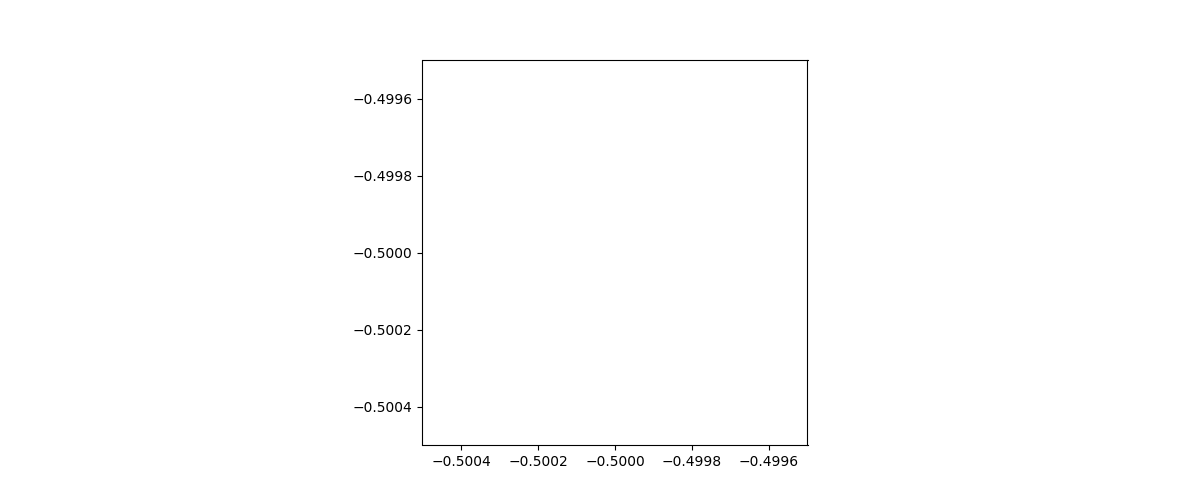

In [11]:
plt::figure_size(1200,500);
plt::imshow(out);
auto pltImg = displayImage(out);
pltImg

In [12]:
///
/// AUTOGRADER TEST - DO NOT REMOVE
///


In [13]:
///
/// AUTOGRADER TEST - DO NOT REMOVE
///


# <font style = "color:rgb(50,120,229)">Additional Exercise</font>

In this assignment you implemented 2 of the several measures of focus. Now, try to implement the rest of the measures of focus and see if your output matches the output you obtained using the above 2 methods. 

Which method do you think is the best one and why? Share your answers on the discussion forum.